In [14]:
#Lucas Ross 6 Dec 2022

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
#1. get dataset
df = pd.read_csv("boston.csv")

#2-5. EDA
print(df.shape)
print(df.dtypes) #all values are floats/ints, so no data manipulation is necessary
print(df.describe())

(506, 13)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object
             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   


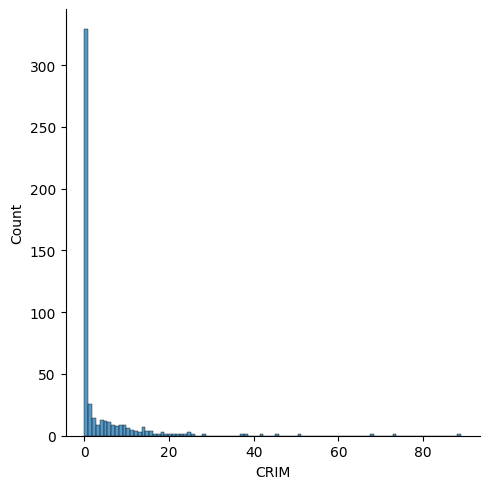

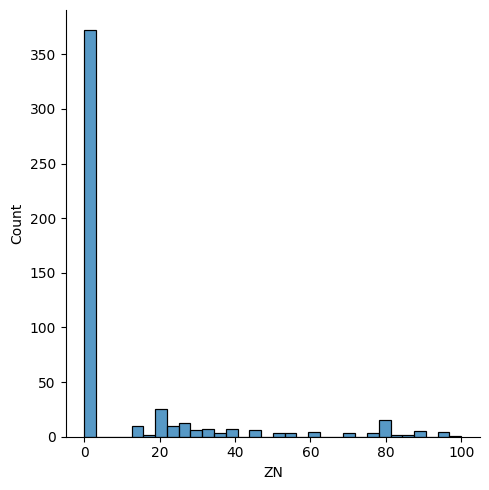

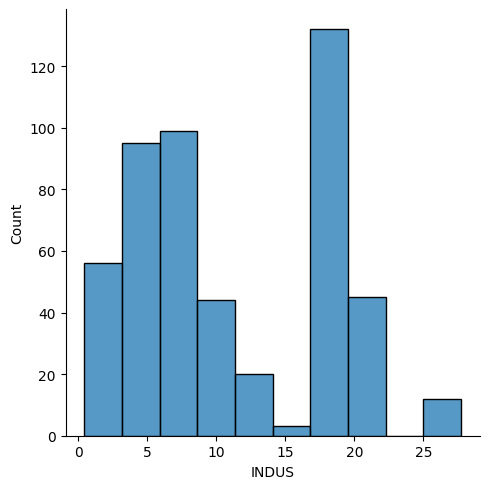

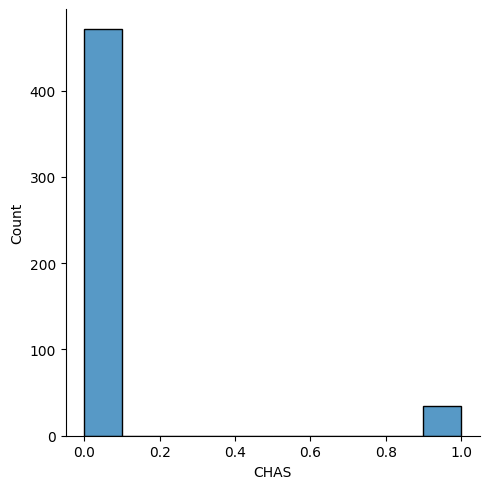

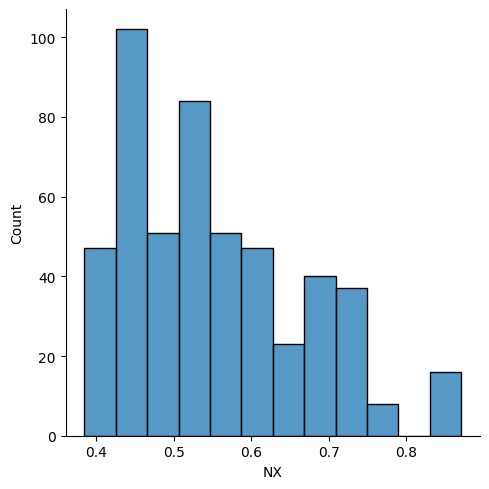

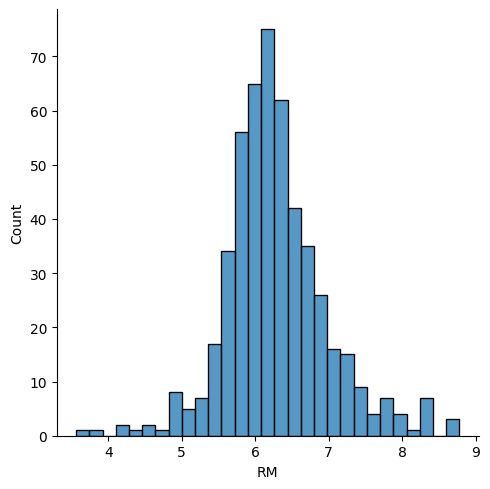

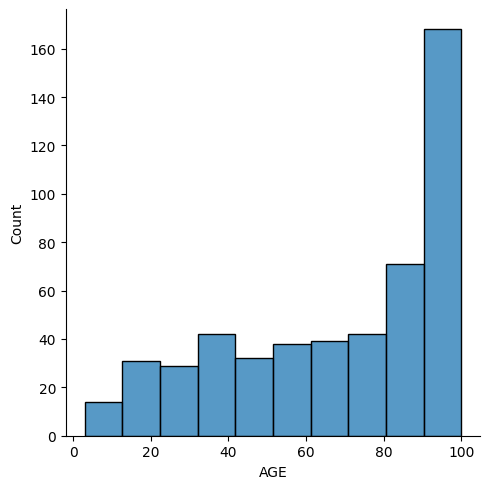

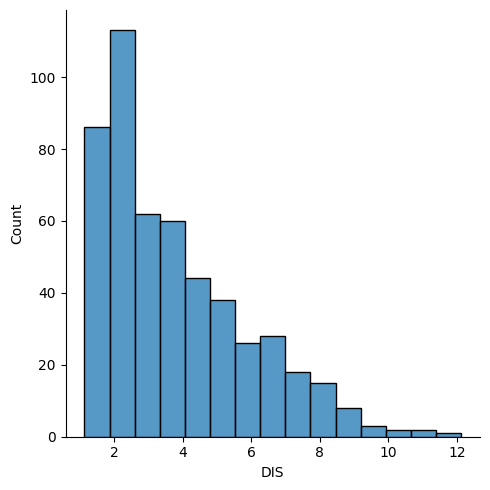

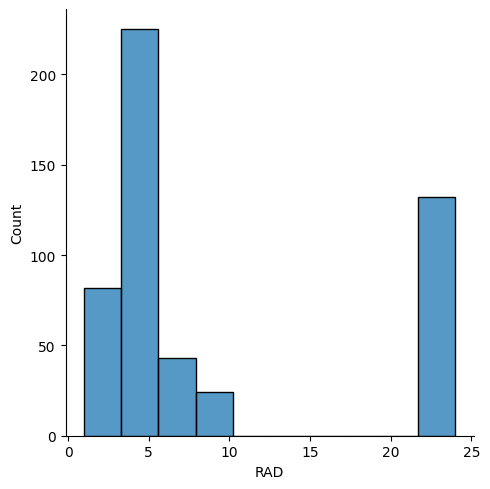

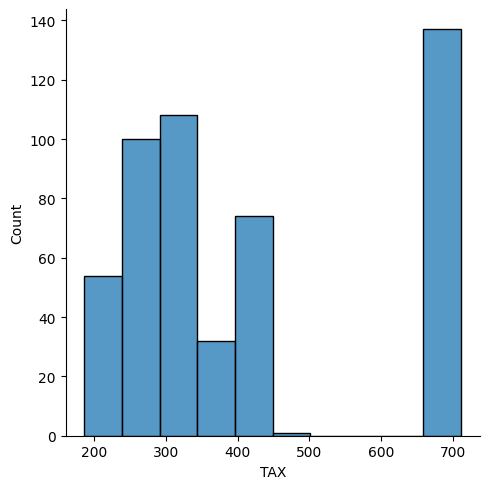

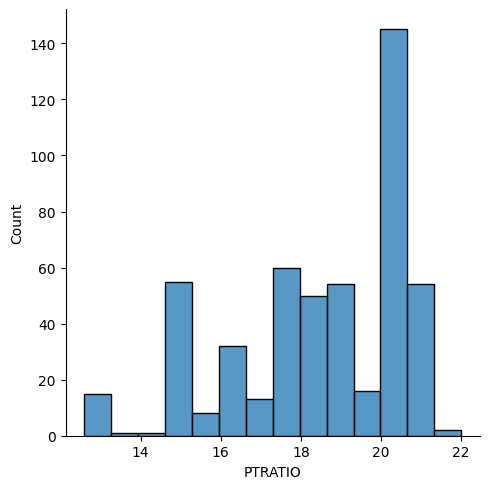

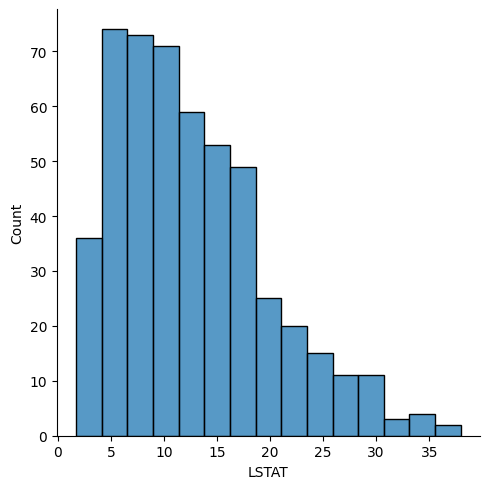

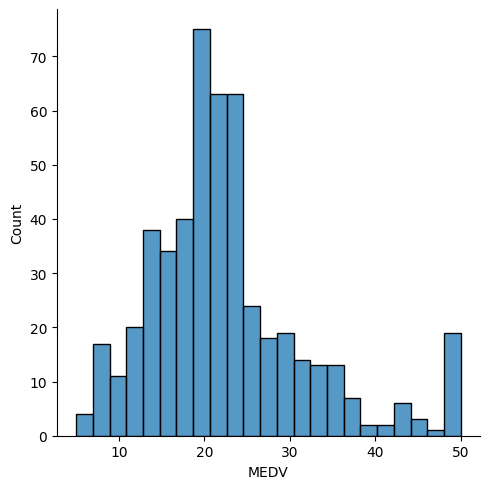

In [16]:
'''
7. distribution plots

observations:
- CRIM, ZN, CHAS are primarily values of 0
- NX is skewed right
- RM seems normally distributed
- AGE is skewed left
- DIS is skewed right
- TAX, RAD, INDUS have dips
- LSTAT, MEDV are skewed right
- RAD, TAX, MEDV, INDUS have high-value outliers
'''
for i in df.columns:
    sns.displot(df[i])

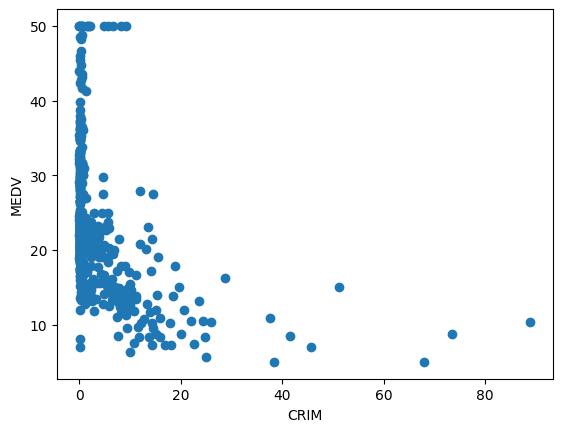

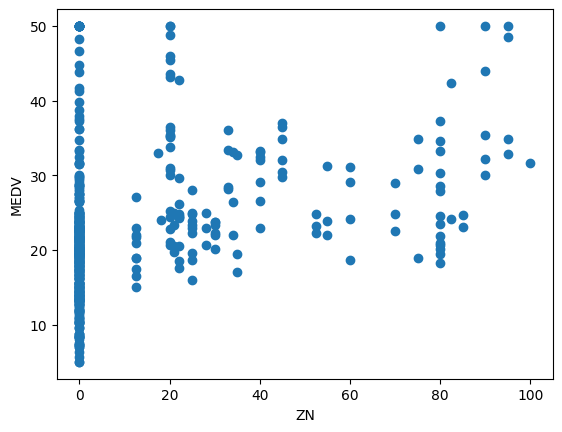

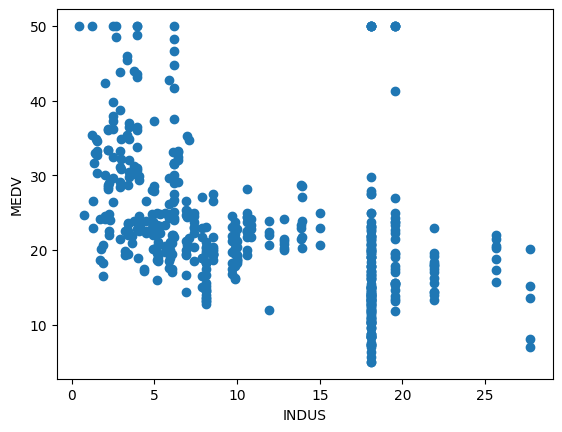

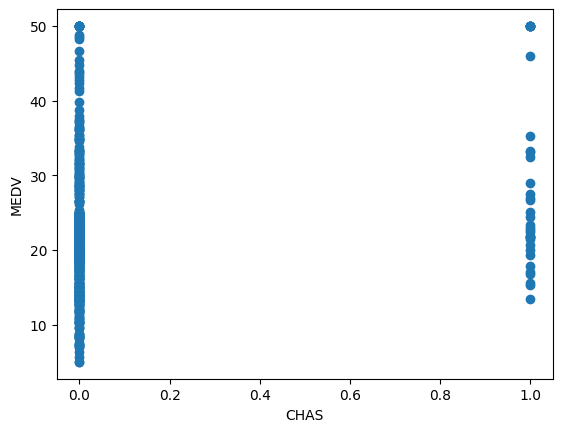

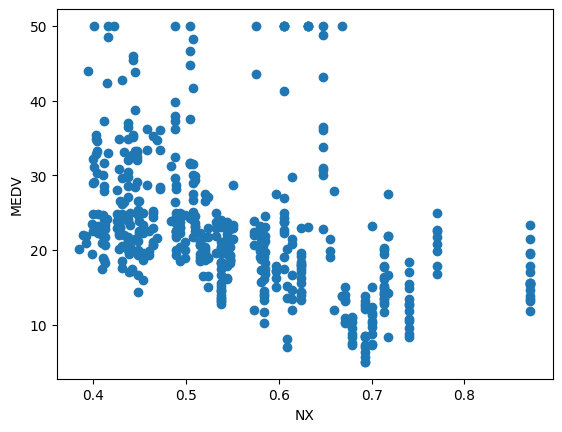

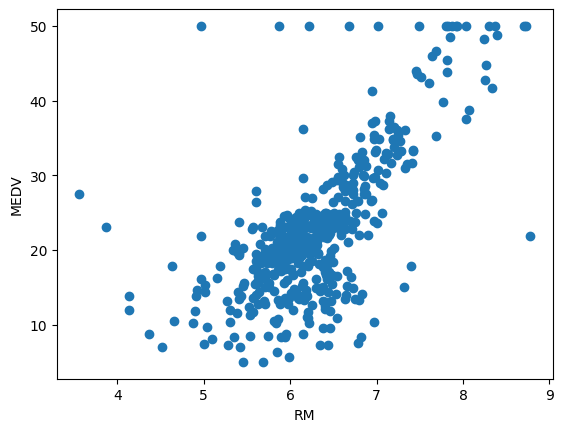

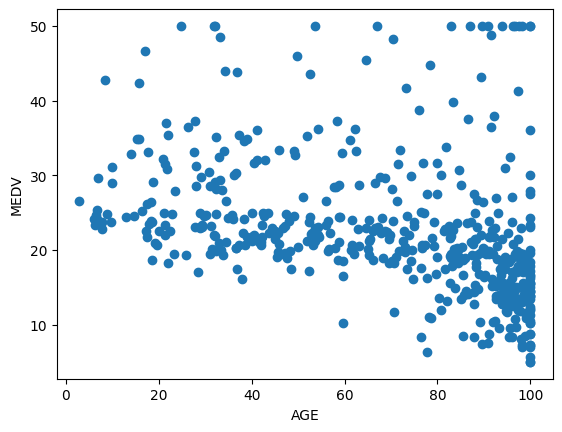

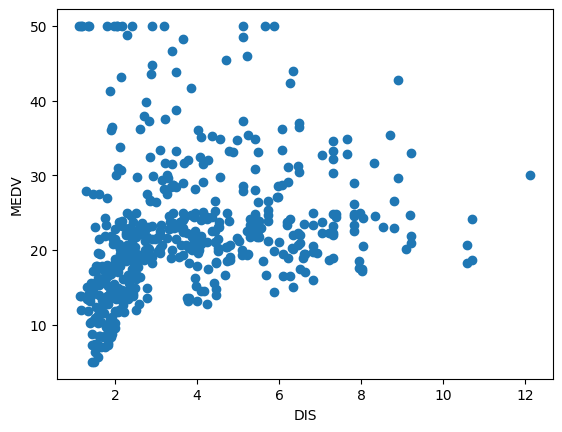

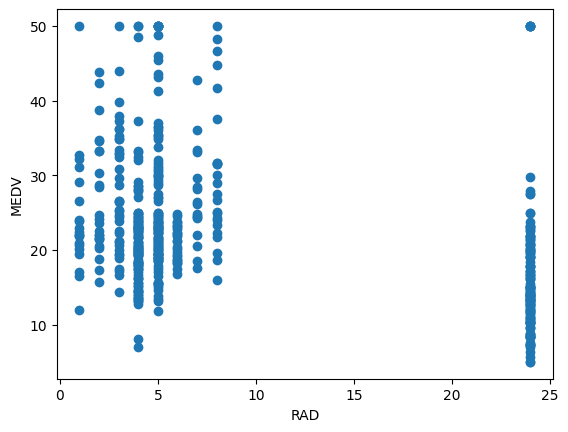

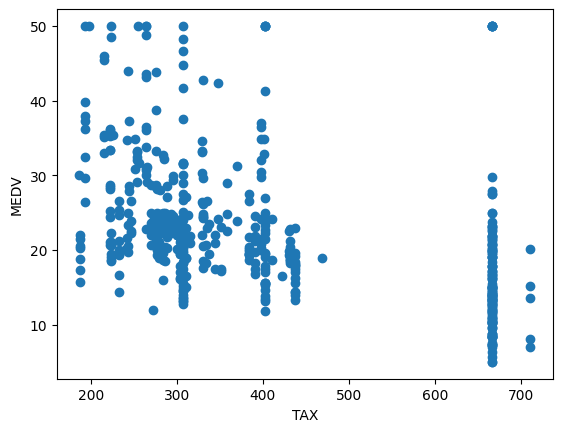

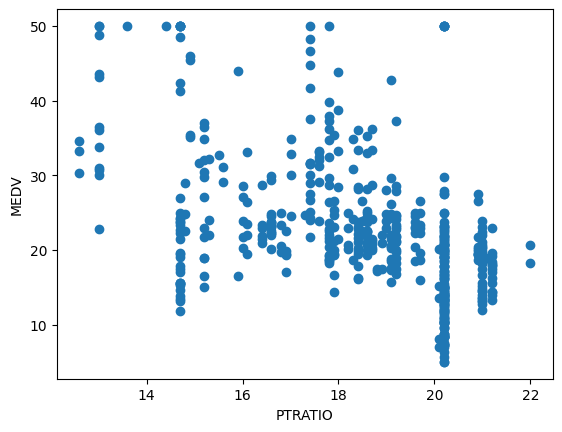

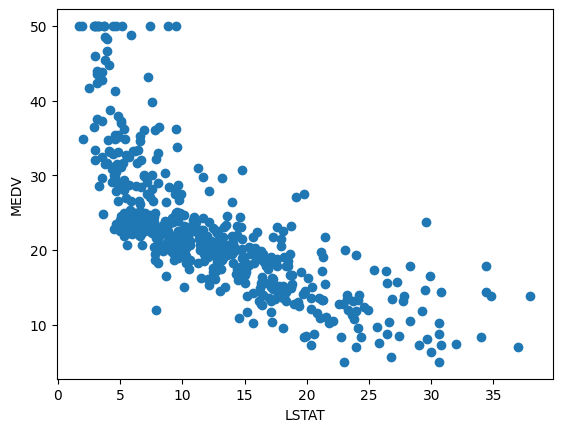

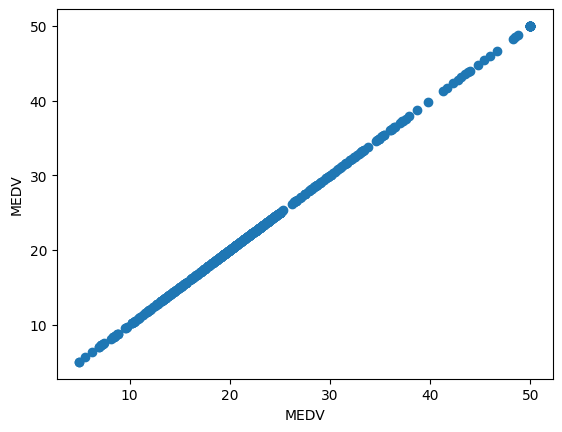

In [17]:

'''
8. scatter plot between indp vars and MEDV

observations:
- ZN, INDUS, CHAS, NX, RAD, TAX, PTRATIO had somewhat limited x-values
- CHAS is a binary variable (0 or 1)
'''

y = df["MEDV"]
for i in df.columns:
    plt.scatter(df[i], y)
    plt.ylabel("MEDV")
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

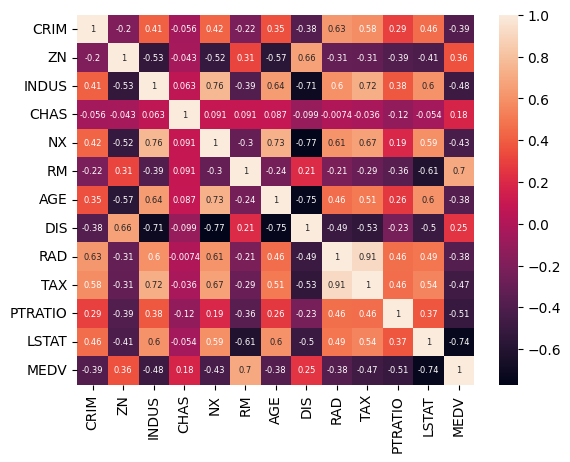

In [18]:
'''
9. heatmap

observations:
- relatively high correlation between TAX and RAD
- somewhat low correlation between DIS and INDUS, NX, AGE
- somewhat low correlation between LSTAT and MEDV
- nearly no corrleation between CHAS and all variables
'''

#df.corr() gets correlation between all combinations of two indp vars (symettrical)
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":6})

In [29]:
'''
10. split the data

indp var: everything else
dep var: DIS (weighted distances to five Boston employment centers)
'''
x = df.drop(["DIS"], axis=1)
y = df[["DIS"]]

#split into 70:30
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [30]:
'''
11. train the model (fit the model)
'''
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [31]:
'''
12. get R^2 value

R^2 has 70.3% accuracy, so its pretty good
'''
r2 = model.score(xtest, ytest)
print(r2)

0.703713219782197


In [32]:
'''
13. get coefficients

(distance from 0)
largest coef:   NX
smallest coef:  TAX

observations:
- most coefficients are very close to zero
- in the heatmap, INDUS, NX, and AGE had higher correlation. however, only NX has a statistically significant coefficient
- ZN, RM, and MEDV have positive correlation. however, MEDV is negative
'''

coef = []

#get coefficients (slope)
for idx, col_name in enumerate(xtrain.columns):
    co = model.coef_[0][idx] #get the coefficient (its in a matrix)
    var = col_name #get the variable name
    print(str(var) + ":\t\t\t" + str(co))
    coef.append(co)

CRIM:			-0.028755101125499682
ZN:			0.03478416957406568
INDUS:			-0.04430320561440291
CHAS:			-0.040823396625348334
NX:			-5.632916067688967
RM:			0.0057583370257791675
AGE:			-0.01694338359841563
RAD:			0.03421960185803865
TAX:			-0.0019279695240498776
PTRATIO:			0.023557981148175956
LSTAT:			-0.020920959504732797
MEDV:			-0.06119894979559253
